# Heart Disease Prediction


### Insights:

#### ->The dependent variable is "heart_desease_present" and others are independedent variables
#### ->We need to predict the patient wheather have a heart desease or not by using this data set
#### ->here dataset is small and related to medical field hence we need to analyse each and every feature carefully

# 1. Import necessary packages

In [79]:
import pandas as pd
import numpy as np
from scipy import stats
import pylab
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pickle as pkl

# 2. Import Data_Set

In [80]:
data1 = pd.read_csv("values.csv")
data1.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [81]:
data2= pd.read_csv("labels.csv")
data2.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


### Merging data_sets
we have given data in 2 files so for doing some exploratory data analysis we need data in a single DataFrame .so,merging the two datasets to make it as one dataset


In [82]:
data = pd.merge(data1,data2)

In [83]:
#printing the top 5 to check wheather the data readed correctly
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


# 3.Exploratory Data Analysis(EDA)

In [84]:
#to find shape of data
data.shape

(180, 15)

### Finding is there any NaN value present in our data_set

In [85]:
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

While taking Isnull we got that there is no features with NaN values so we doent need to handle Nan Values

### Encoding the data with One Hot Encoder
our data contains features of object type.so, we need to convert those features into numerical type.here "thal" ia a nominal categorical feature so we need to use "One Hot Encoding"

In [86]:

thal = pd.get_dummies(data.thal,drop_first=True)
thal

,normal,reversible_defect
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
175,0,1
176,1,0
177,0,1
178,1,0


In [87]:
data = pd.concat([data,thal],axis=1)

In [88]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,normal,reversible_defect
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0,1,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0,1,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1,1,0
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0,0,1


In [89]:
#pirnting the data
data.drop(columns=["thal"],inplace=True)
data.head()

,patient_id,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,normal,reversible_defect
0,0z64un,1,128,2,0,0,2,308,0.0,1,45,170,0,0,1,0
1,ryoo3j,2,110,3,0,0,0,214,1.6,0,54,158,0,0,1,0
2,yt1s1x,1,125,4,3,0,2,304,0.0,1,77,162,1,1,1,0
3,l2xjde,1,152,4,0,0,0,223,0.0,1,40,181,0,1,0,1
4,oyt4ek,3,178,1,0,0,2,270,4.2,1,59,145,0,0,0,1


# 4.Feature Selection

### 1.Dropping features with no impact in target

we know that the features like names,id,number will not affect our target hence,we can drop features like that .
In our data set we have "patient_id" so, we drop it directly

In [90]:
data.drop(columns=["patient_id"],inplace=True,axis=1)

### 2. Finding variance for dropping features with low variance (less than 0.1)

while considering variance if the variance is too low means that feature doent play the major role in finding the Target. so,that low variance features can be dropped 

In [91]:
variance  = VarianceThreshold(0.1)
variance.fit(data)
variance.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

while considering threshold variance, variance of  all features are grater than our cut off 0.1 ,hence we cannot drop any features from the data set

### 3.Finding correlation to drop features with highly corrilated to each other(Independent features)

here we are considering 0.8 as our cutoff and if any features exeeds the cutoff then we can say that they are duplicates of other features so we can remove those duplicates from our data 

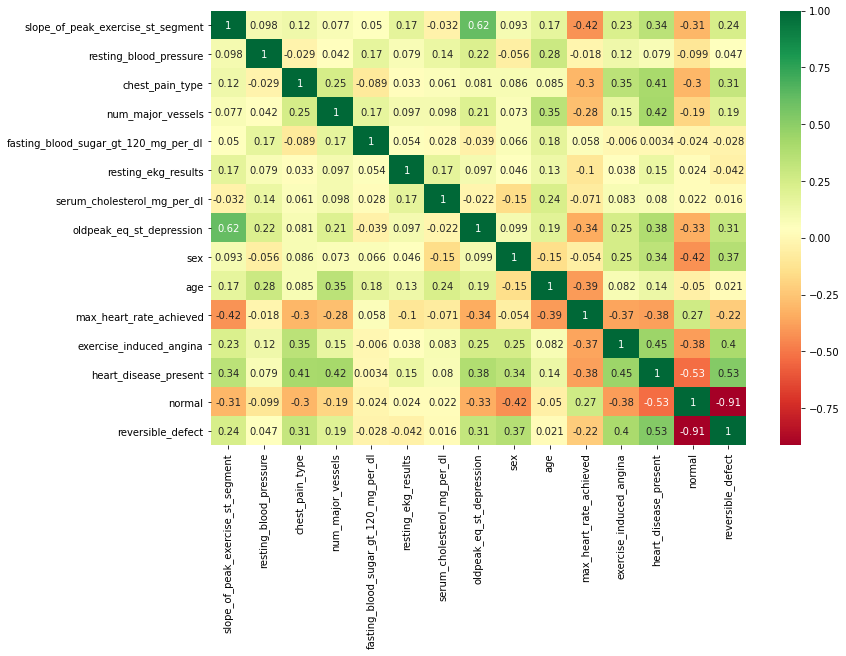

In [92]:
#creating a heat map for finding corrilation easily
from matplotlib.pyplot import colormaps
plt.rcParams["figure.figsize"] = 12,8
correlation = data.corr()
sb.heatmap(correlation,annot=True,cmap ="RdYlGn")

considering heatmap the correlation between the independent feature exeeds the cutoff range but its in negative side so we are not going to drop the feature

### 4.Finding correlation to drop features with low correlation with Target feature(Dependent)

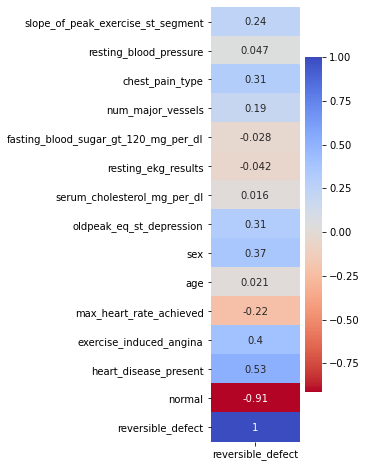

In [93]:
plt.rcParams["figure.figsize"] = 2,8
correlation_dep = data.corr()
sb.heatmap(correlation_dep.iloc[:,-1:],annot=True,cmap = "coolwarm_r")

From the above heat map we can see that there are some features which have very low corrilation with the depended variable so we can drop those features

In [94]:
#code To drop features from Data_s
cor_column_names = correlation_dep.iloc[-1:,].columns.tolist()
drop_col_name = []
for x,i in enumerate(cor_column_names):
    if (-0.1 < correlation_dep.iloc[-1:,x][0] < 0.1):
        drop_col_name.append(i)

In [95]:
#features with low correlation with target
print(drop_col_name)

['resting_blood_pressure', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'serum_cholesterol_mg_per_dl', 'age']


#### Droping low correlation features with target 

In [96]:
data.drop(columns=drop_col_name,inplace=True)

In [97]:
data.head()

,slope_of_peak_exercise_st_segment,chest_pain_type,num_major_vessels,oldpeak_eq_st_depression,sex,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,normal,reversible_defect
0,1,2,0,0.0,1,170,0,0,1,0
1,2,3,0,1.6,0,158,0,0,1,0
2,1,4,3,0.0,1,162,1,1,1,0
3,1,4,0,0.0,1,181,0,1,0,1
4,3,1,0,4.2,1,145,0,0,0,1


# 5.Checking Normality of the Continues Features

We need to find the normality of continues features before modelling . if the features are not normal then we need to normalise those features


In [98]:
#setting the figure size 
plt.rcParams["figure.figsize"] = 6,4

defining a functtion to print distplot and QQ plot for the independent features

In [99]:

def plotting(data,colname):
    plt.subplot(1,2,1)
    sb.distplot(data[colname])
    plt.subplot(1,2,2)
    stats.probplot(data[colname],plot=pylab)

#### taking features one by one for normality check

 skewness :  0.660585714798187 
 kertosis :  -0.5242735181877825


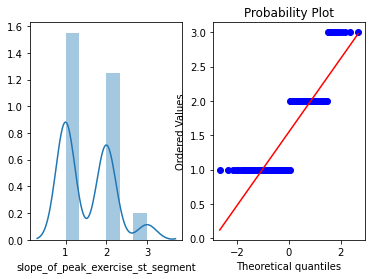

In [100]:
# printing the skewness and kurosis and also plotting the graph
print(" skewness : ",stats.skew(data.slope_of_peak_exercise_st_segment),"\n","kertosis : ",stats.kurtosis(data.slope_of_peak_exercise_st_segment))
plotting(data,"slope_of_peak_exercise_st_segment")


-> Here the data is categorical hence we doesn't need to normalise the data 

 skewness :  -0.8421645409638178 
 kertosis :  -0.30334358168598907


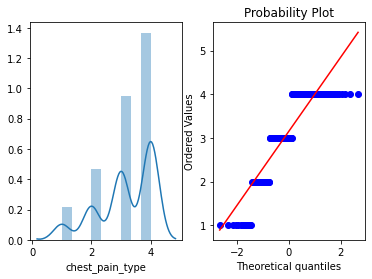

In [101]:
# printing the skewness and kurosis and also plotting the graph
print(" skewness : ",stats.skew(data.chest_pain_type),"\n","kertosis : ",stats.kurtosis(data.chest_pain_type))
plotting(data,"chest_pain_type")

-> Here the data is categorical hence we doesn't need to normalise the data 

 skewness :  1.1582430715853718 
 kertosis :  0.10105467293001613


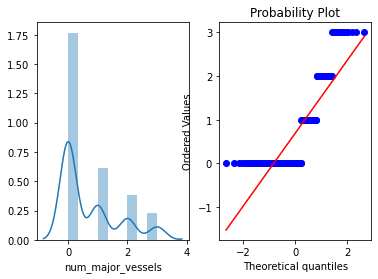

In [102]:
# printing the skewness and kurosis and also plotting the graph
print(" skewness : ",stats.skew(data.num_major_vessels),"\n","kertosis : ",stats.kurtosis(data.num_major_vessels))
plotting(data,"num_major_vessels")

-> Here the data is categorical hence we doesn't need to normalise the data 

 skewness :  -0.1784842993012638 
 kertosis :  -1.9681433549029368


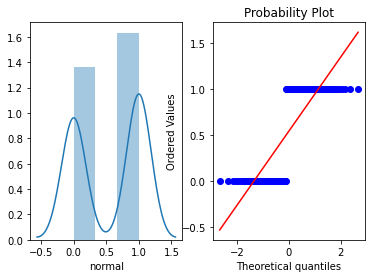

In [103]:
# printing the skewness and kurosis and also plotting the graph
print(" skewness : ",stats.skew(data.normal),"\n","kertosis : ",stats.kurtosis(data.normal))
plotting(data,"normal")

-> Here the data is categorical hence we doesn't need to normalise the data 

 skewness :  1.4948214849547024 
 kertosis :  3.1202655698924504


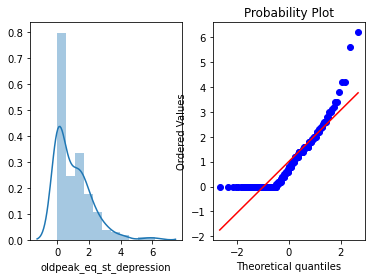

In [104]:
# printing the skewness and kurosis and also plotting the graph
print(" skewness : ",stats.skew(data.oldpeak_eq_st_depression),"\n","kertosis : ",stats.kurtosis(data.oldpeak_eq_st_depression))
plotting(data,"oldpeak_eq_st_depression")

-> Here the feature is continues but it is not in normal distribution . so, we need to convert the data to normal distribution 
           

-> Here the data is possitively skweed and also has a positive kurtosis

 skewness :  -0.8160261132534429 
 kertosis :  -1.3341013824884798


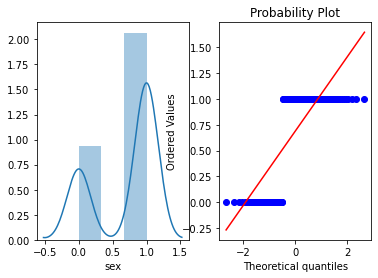

In [105]:
# printing the skewness and kurosis and also plotting the graph
print(" skewness : ",stats.skew(data.sex),"\n","kertosis : ",stats.kurtosis(data.sex))
plotting(data,"sex")

-> Here the data is categorical hence we doesn't need to normalise the data 

 skewness :  0.36131100174171604 
 kertosis :  -1.8694543600203979


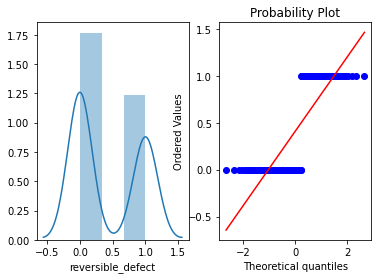

In [106]:
# printing the skewness and kurosis and also plotting the graph
print(" skewness : ",stats.skew(data.reversible_defect),"\n","kertosis : ",stats.kurtosis(data.reversible_defect))
plotting(data,"reversible_defect")

-> Here the feature is continues and we can see that it belongs to a normal distribution from QQ plot and Distplot

-> Here the squeness and kurtosis are in range. hence, it belongs to a normal distribution curve

 skewness :  -0.3904163075399945 
 kertosis :  -0.5028077850377723


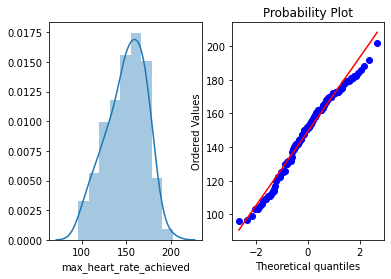

In [107]:
# printing the skewness and kurosis and also plotting the graph
print(" skewness : ",stats.skew(data.max_heart_rate_achieved),"\n","kertosis : ",stats.kurtosis(data.max_heart_rate_achieved))
plotting(data,"max_heart_rate_achieved")

-> Here the feature is continues and we can see that it belongs to a normal distribution from QQ plot and Distplot

-> Here the squeness and kurtosis are in range. hence, it belongs to a normal distribution curve

 skewness :  0.7882318002900207 
 kertosis :  -1.378690629011553


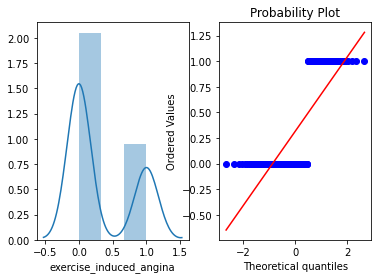

In [108]:
# printing the skewness and kurosis and also plotting the graph
print(" skewness : ",stats.skew(data.exercise_induced_angina),"\n","kertosis : ",stats.kurtosis(data.exercise_induced_angina))
plotting(data,"exercise_induced_angina")

-> Here the data is categorical hence we doesn't need to normalise the data 

# 6. Normalising the Features

#### while considering QQ plot there is only one feature which is not belongs to normal distribution:  " oldpeak_eq_st_depression "

changing the feature "oldpeak_eq_st_depression" with respect to squareroot formatting to make the feature to normal distribution

In [109]:
#taking the square root and changing the Feature with respect to square root
data["oldpeak_eq_st_depression"] = data.oldpeak_eq_st_depression ** (1/2)

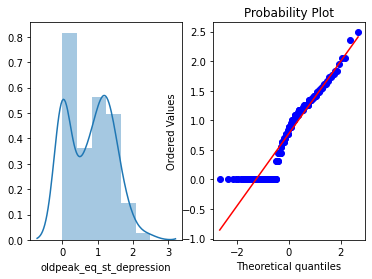

In [110]:
plotting(data,"oldpeak_eq_st_depression")

In [111]:
print(" skewness : ",stats.skew(data.oldpeak_eq_st_depression),"\n","kertosis : ",stats.kurtosis(data.oldpeak_eq_st_depression))

 skewness :  0.14135733098338193 
 kertosis :  -1.0327004031254725


-> Here we changed the squeness and kurtosis in range hence our feature is now normalised according to square root transformation technique

-> hence our feature is normalised under squeness and kurtosis 

# 7.Handling Outliers 

### while considering outliers we need to take all the features with continues distribution :
     Here we have 2 features with continues distribution : oldpeak_eq_st_depression,max_heart_rate_achieved.

#### --considering feature :"max_heart_rate_achieved"

In [112]:
#finding mean and standard deviation for finding lower and upper boundary
mean = data.max_heart_rate_achieved.mean()
standard_deviation = data.max_heart_rate_achieved.std()
print("              mean : ",mean)
print("standard_deviation : ",standard_deviation)

              mean :  149.48333333333332
standard_deviation :  22.0635129422301


here we are taking +3 sigma to -3 sigma as our range and considering values exeeds 3 sigma as outliers. first we find the lower and upper boundery then consider the outliers

In [113]:
#lower boundary and upper boundary
lower_boundary = mean - (3 * standard_deviation)
upper_boundary = mean + (3 * standard_deviation)
print("lower_boundary : ", lower_boundary)
print("upper_boundary : ", upper_boundary)

lower_boundary :  83.29279450664302
upper_boundary :  215.67387216002362


We know that heart rate feature will not come negative ,so need to consider upper boundary only.

-> Here we are not dropping the outliers because our data is too small .so we converting the outlier value to the upper    boundary value

In [114]:
data.loc[data.max_heart_rate_achieved > upper_boundary,"max_heart_rate_achieved"] = upper_boundary

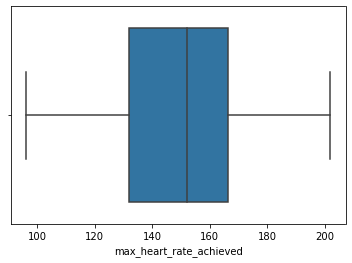

In [115]:
sb.boxplot(data.max_heart_rate_achieved)

-> From the above box plot it is clear that all the outliers are cleared 

#### --considering feature :"oldpeak_eq_st_depression"

In [116]:
#finding mean and standard deviation for finding lower and upper boundary
mean = data.oldpeak_eq_st_depression.mean()
standard_deviation = data.oldpeak_eq_st_depression.std()
print("              mean : ",mean)
print("standard_deviation : ",standard_deviation)

              mean :  0.7783753105098453
standard_deviation :  0.6374869378789595


here we are taking +3 sigma to -3 sigma as our range and considering values exeeds 3 sigma as outliers. first we find the lower and upper boundery then consider the outliers

In [117]:
#lower boundary and upper boundary
lower_boundary = mean - (3 * standard_deviation)
upper_boundary = mean + (3 * standard_deviation)
print("lower_boundary : ", lower_boundary)
print("upper_boundary : ", upper_boundary)

lower_boundary :  -1.1340855031270332
upper_boundary :  2.690836124146724


here the minimum is zero hence this feature will not come negative ,so need to consider upper boundary only.

-> Here we are not dropping the outliers because our data is too small .so we converting the outlier value to the upper    boundary value

In [118]:
data.loc[data.oldpeak_eq_st_depression > upper_boundary,"oldpeak_eq_st_depression"] = upper_boundary

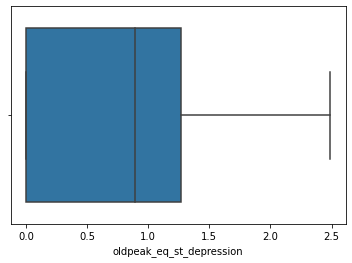

In [119]:
sb.boxplot(data.oldpeak_eq_st_depression)

-> From the above box plot it is clear that all the outliers are cleared

# 8. Define X and Y

In [120]:
data.columns

Index(['slope_of_peak_exercise_st_segment', 'chest_pain_type',
       'num_major_vessels', 'oldpeak_eq_st_depression', 'sex',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present', 'normal', 'reversible_defect'],
      dtype='object')

In [121]:
X = data.loc[:,['slope_of_peak_exercise_st_segment', 'chest_pain_type','num_major_vessels', 'oldpeak_eq_st_depression', 'sex','max_heart_rate_achieved', 'exercise_induced_angina', 'normal', 'reversible_defect']]
y = data.heart_disease_present

In [122]:
X.head()

,slope_of_peak_exercise_st_segment,chest_pain_type,num_major_vessels,oldpeak_eq_st_depression,sex,max_heart_rate_achieved,exercise_induced_angina,normal,reversible_defect
0,1,2,0,0.000000,1,170.0,0,1,0
1,2,3,0,1.264911,0,158.0,0,1,0
2,1,4,3,0.000000,1,162.0,1,1,0
3,1,4,0,0.000000,1,181.0,0,0,1
4,3,1,0,2.049390,1,145.0,0,0,1


# 9.Scalling using standard scalar
here the features are of different values so we need to do scaling

In [123]:
column_names= X.columns
scale = StandardScaler()
X = scale.fit_transform(X)

In [124]:
#converting back to data frame from array
X = pd.DataFrame(X,columns=column_names)
X.head()

,slope_of_peak_exercise_st_segment,chest_pain_type,num_major_vessels,oldpeak_eq_st_depression,sex,max_heart_rate_achieved,exercise_induced_angina,normal,reversible_defect
0,-0.891241,-1.234775,-0.718403,-1.224412,0.672022,0.932485,-0.680746,0.914732,-0.835532
1,0.729197,-0.166220,-0.718403,0.765338,-1.488048,0.387084,-0.680746,0.914732,-0.835532
2,-0.891241,0.902335,2.385097,-1.224412,0.672022,0.568884,1.468977,0.914732,-0.835532
3,-0.891241,0.902335,-0.718403,-1.224412,0.672022,1.432436,-0.680746,-1.093216,1.196843
4,2.349636,-2.303330,-0.718403,1.999351,0.672022,-0.203768,-0.680746,-1.093216,1.196843


# 10.Train_Test_Split

splitting the data according to train test split at random state 13 and test size as 0.2

In [125]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =10,test_size =0.25)

# 11.Checking Target Feature is Balaced or NOT

If data is not balanced we need to balance the data using over sampling technique

Counter({0: 100, 1: 80})


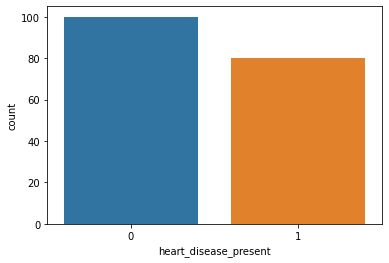

In [126]:
#printing the count and plotting the count plot
print(Counter(data.heart_disease_present))
sb.countplot(data.heart_disease_present)
plt.show()

-> Here we can see that our data is slightly unbalanced . here our data sets is too small so we need to balance the data

### Balancing the data using SMOTE

here we have only 180 data points in total in which 100 belongs to "0" and 80 belongs to "1".hence there is a 20% differnce btween 2 categories 

In [127]:
model_Bal = SMOTE(k_neighbors=2)
X_train_smote,y_train_smote = model_Bal.fit_sample(X_train,y_train)
Counter(y_train_smote)

Counter({1: 72, 0: 72})

# 12.Modelling using Logistic Regression
Here we are considering logistic regression as our ML model

In [128]:
#modelling
model =LogisticRegression(random_state=10)
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test)

### ->Acuuracy_Score

In [129]:
accuracy_score(y_test,y_predict)

0.8888888888888888

hence according to logistic regression 84.4 % is a better score 

### ->Cross_Tab

In [130]:
pd.crosstab(y_test,y_predict)

col_0,0,1
heart_disease_present,,
0,26,2
1,3,14


 -> Here ,from "0"s 26 are correctly predicted and 2 are misspredicted as "1"s

-> From "1"s 14 are correctly predicted and 3 are misspredicted as "0"s 

### ->Classification_Report

In [131]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        28
           1       0.88      0.82      0.85        17

    accuracy                           0.89        45
   macro avg       0.89      0.88      0.88        45
weighted avg       0.89      0.89      0.89        45



### -> Cross_Validation

In [132]:
cross_val = cross_val_score(LogisticRegression(),X,y,cv=8)
cross_val

array([0.7826087 , 0.86956522, 0.91304348, 1.        , 0.86363636,
       0.72727273, 0.77272727, 0.81818182])

In [133]:
print("maximum cross_val_score : ",cross_val.max())
print("minimum cross_val_score : ",cross_val.min())
print("average cross_val_score : ",cross_val.mean())

maximum cross_val_score :  1.0
minimum cross_val_score :  0.7272727272727273
average cross_val_score :  0.8433794466403162


Here we are getting cross_val score range is between 68% and 92% and getting an average 82% .Hence, our model is not overfitted
and gives a good score regarding accuracy score as well as classification report

#### for further consideration we are doing one more model regarding trees . ie,Random Forest 

# 13. Modelling using Random Forest

In [134]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_predit = model.predict(X_test)

### -> Accuracy_Score

In [135]:
accuracy_score(y_test,y_predict)

0.8888888888888888

here accuracy score is getting same as of logistic regression 88.8%

### -> Cross_Tab

In [136]:
pd.crosstab(y_test,y_predict)

col_0,0,1
heart_disease_present,,
0,26,2
1,3,14


### ->Classification_Report

In [137]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        28
           1       0.88      0.82      0.85        17

    accuracy                           0.89        45
   macro avg       0.89      0.88      0.88        45
weighted avg       0.89      0.89      0.89        45



### -> Cross_val_score

In [138]:
cross_val = cross_val_score(RandomForestClassifier(),X,y,cv=8)
cross_val

array([0.73913043, 0.86956522, 0.86956522, 0.91304348, 0.90909091,
       0.77272727, 0.72727273, 0.81818182])

In [139]:
print("maximum cross_val_score : ",cross_val.max())
print("minimum cross_val_score : ",cross_val.min())
print("average cross_val_score : ",cross_val.mean())

maximum cross_val_score :  0.9130434782608695
minimum cross_val_score :  0.7272727272727273
average cross_val_score :  0.8273221343873518


Here we are getting cross_val score range is between 65% and 91% and getting an average 81% .Hence, our model is not overfitted
and gives a good score regarding accuracy score as well as classification report

## 14.Grid_search_CV (Hyper_parameter_Tuning)

grid search _cv is using for hyper parameter tuning to get a better parameters to load the model

In [140]:
#creating a param grid of dictionary for loading the parameters
params = { "n_estimators"      : [50,75,100,125,150],
           "random_state"      : [10,13,23,40],
           "max_leaf_nodes"    : [4,8,10,12],
           "min_samples_split" : [2,4,6],
           "max_depth"         : [5,7,9,11],
           "max_features"      : [5,6,7,8,9]
         }

In [76]:
#grid_score = GridSearchCV(RandomForestClassifier(),param_grid=params,verbose=2,scoring="accuracy")
#grid_score.fit(X_train,y_train)

In [68]:
grid_score.best_score_

0.837037037037037

In [69]:
grid_score.best_params_

{'max_depth': 5,
 'max_features': 7,
 'max_leaf_nodes': 12,
 'min_samples_split': 6,
 'n_estimators': 100,
 'random_state': 13}

#### ->Remodelling using parameters from Grid Search CV

In [141]:
model = RandomForestClassifier(max_depth=5,max_features=7,max_leaf_nodes=12,min_samples_split=6,n_estimators=100,random_state=13)
model.fit(X_train,y_train)
y_predit = model.predict(X_test)

In [142]:
accuracy_score(y_test,y_predict)

0.8888888888888888

 While considering hyper parameter tuning random forest gives 88 % 
   

In [143]:
pd.crosstab(y_test,y_predict)

col_0,0,1
heart_disease_present,,
0,26,2
1,3,14


In [144]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        28
           1       0.88      0.82      0.85        17

    accuracy                           0.89        45
   macro avg       0.89      0.88      0.88        45
weighted avg       0.89      0.89      0.89        45



## 15.saving model (using pickle)

In [145]:
pkl.dump(model,open("model.pkl","wb"))

saving the model as a pickle file in the binary format

# 16.Conclussion

-> Hence comparing both logistic and random forest both gives same accuracy so, we desided to go with Random forest        model,beacuase it is more stable a new data set comes


-> The data is small hence while using logistic_regression it may take more complicated while considering Best_Fit_Line

-> Exporting the model for further requirements 